In [1]:
import numpy as np
import matplotlib.pyplot as plt

from blockcg import blockcg, parallelcg, laplacian2D_dirichlet, laplacian2D_neumann, random_spd_with_p_eigenvalues

# Example usage

In [ ]:
# Make example SPD matrix A
grid_shape = (50,50)
A, K = laplacian2D_dirichlet(grid_shape)

# Make Xtrue and RHS B = A Xtrue
np.random.seed(0)
n_rhs = 20
Xtrue = np.random.normal(size=(A.shape[1],n_rhs))
B = A @ Xtrue

# Solve by various methods
tol = 1e-13
maxiter = 600
Xp, infos_p = parallelcg(A, B, X0=None, tol=tol, M=None, Xtrue=Xtrue, K=K)
Xdp, info_dp = blockcg(A, B, X0=None, tol=tol, variant="DP", Xtrue=Xtrue, maxiter=maxiter, K=K)
Xbf, info_bf = blockcg(A, B, X0=None, tol=tol, variant="BF", Xtrue=Xtrue, maxiter=maxiter, K=K)
Xhs, info_hs = blockcg(A, B, X0=None, tol=tol, variant="HS", Xtrue=Xtrue, maxiter=maxiter, K=K)

/Users/jonathanlindbloom/miniforge3/envs/jlinops/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


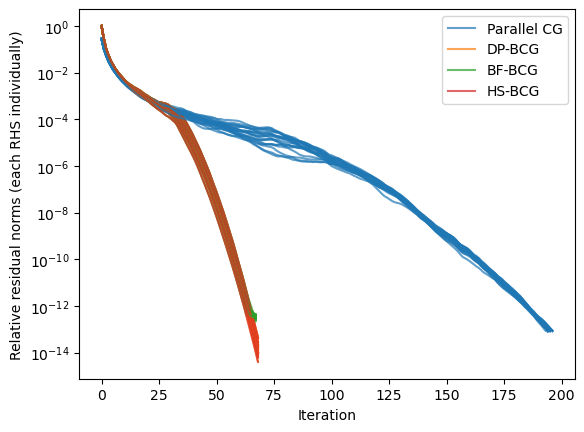

In [8]:
alpha = 0.7
for j in range(n_rhs):
    if j == 0:
        plt.semilogy( infos_p[j]["rel_residual_norms"] , color="C0", label="Parallel CG", alpha=alpha)
        plt.semilogy( info_dp["elem_rel_residual_norms"][j,:] , color="C1", label="DP-BCG", alpha=alpha)
        plt.semilogy( info_bf["elem_rel_residual_norms"][j,:] , color="C2", label="BF-BCG", alpha=alpha)
        plt.semilogy( info_hs["elem_rel_residual_norms"][j,:] , color="C3", label="HS-BCG", alpha=alpha)
    else:
        plt.semilogy( infos_p[j]["rel_residual_norms"] , color="C0", alpha=alpha)
        plt.semilogy( info_dp["elem_rel_residual_norms"][j,:] , color="C1", alpha=alpha)
        plt.semilogy( info_bf["elem_rel_residual_norms"][j,:] , color="C2", alpha=alpha)
        plt.semilogy( info_hs["elem_rel_residual_norms"][j,:] , color="C3", alpha=alpha)

plt.legend()
plt.ylabel("Relative residual norms (each RHS individually)")
plt.xlabel("Iteration")
plt.show()

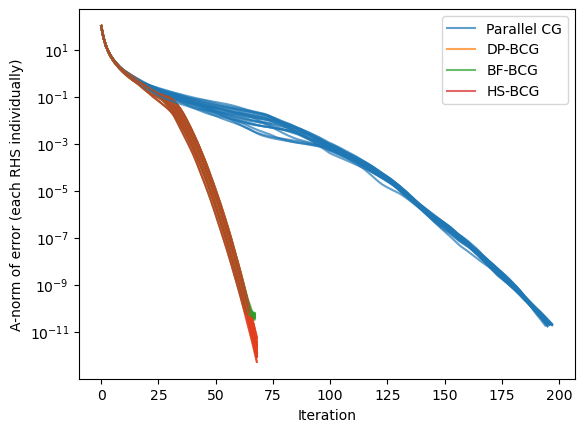

In [9]:
alpha = 0.7
for j in range(n_rhs):
    if j == 0:
        plt.semilogy( infos_p[j]["abs_A_errors"] , color="C0", label="Parallel CG", alpha=alpha)
        plt.semilogy( info_dp["elem_A_errs"][j,:] , color="C1", label="DP-BCG", alpha=alpha)
        plt.semilogy( info_bf["elem_A_errs"][j,:] , color="C2", label="BF-BCG", alpha=alpha)
        plt.semilogy( info_hs["elem_A_errs"][j,:] , color="C3", label="HS-BCG", alpha=alpha)
    else:
        plt.semilogy( infos_p[j]["abs_A_errors"] , color="C0", alpha=alpha)
        plt.semilogy( info_dp["elem_A_errs"][j,:] , color="C1", alpha=alpha)
        plt.semilogy( info_bf["elem_A_errs"][j,:] , color="C2", alpha=alpha)
        plt.semilogy( info_hs["elem_A_errs"][j,:] , color="C3", alpha=alpha)


plt.legend()
plt.ylabel("A-norm of error (each RHS individually)")
plt.xlabel("Iteration")
plt.show()

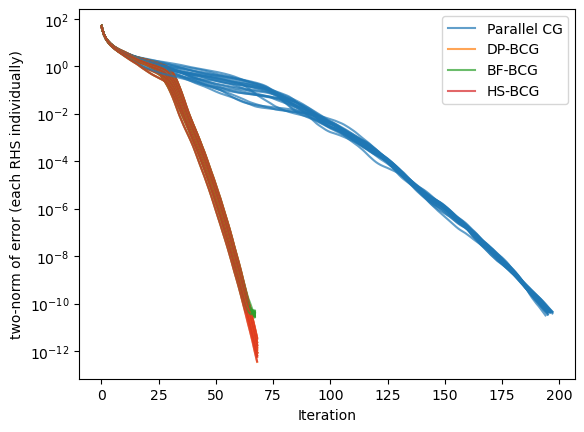

In [10]:
alpha = 0.7
for j in range(n_rhs):
    if j == 0:
        plt.semilogy( infos_p[j]["abs_two_errors"] , color="C0", label="Parallel CG", alpha=alpha)
        plt.semilogy( info_dp["elem_two_errs"][j,:] , color="C1", label="DP-BCG", alpha=alpha)
        plt.semilogy( info_bf["elem_two_errs"][j,:] , color="C2", label="BF-BCG", alpha=alpha)
        plt.semilogy( info_hs["elem_two_errs"][j,:] , color="C3", label="HS-BCG", alpha=alpha)
    else:
        plt.semilogy( infos_p[j]["abs_two_errors"] , color="C0", alpha=alpha)
        plt.semilogy( info_dp["elem_two_errs"][j,:] , color="C1", alpha=alpha)
        plt.semilogy( info_bf["elem_two_errs"][j,:] , color="C2", alpha=alpha)
        plt.semilogy( info_hs["elem_two_errs"][j,:] , color="C3", alpha=alpha)


plt.legend()
plt.ylabel("two-norm of error (each RHS individually)")
plt.xlabel("Iteration")
plt.show()

# Example with linearly dependent RHS

Note that here HS-BCG breaks down early. BF-BCG continues until the block size deflates to zero, and DP-BCG maintains a constant block size.

In [2]:
# Make example SPD matrix A
grid_shape = (50,50)
A, K = laplacian2D_dirichlet(grid_shape)

# Make Xtrue and RHS B = A Xtrue
np.random.seed(0)
n_rhs = 20
Xtrue = np.random.normal(size=(A.shape[1],n_rhs-1))
Xtrue = np.hstack( [Xtrue, (Xtrue[:,2] + 3*Xtrue[:,10])[:,None] ] )
B = A @ Xtrue

# Solve by various methods
tol = 1e-13
maxiter = 600
Xp, infos_p = parallelcg(A, B, X0=None, tol=tol, M=None, Xtrue=Xtrue, K=K)
Xdp, info_dp = blockcg(A, B, X0=None, tol=tol, variant="DP", Xtrue=Xtrue, maxiter=maxiter, K=K)
Xbf, info_bf = blockcg(A, B, X0=None, tol=tol, variant="BF", Xtrue=Xtrue, maxiter=maxiter, K=K)
Xhs, info_hs = blockcg(A, B, X0=None, tol=tol, variant="HS", Xtrue=Xtrue, maxiter=maxiter, K=K)

/Users/jonathanlindbloom/miniforge3/envs/jlinops/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


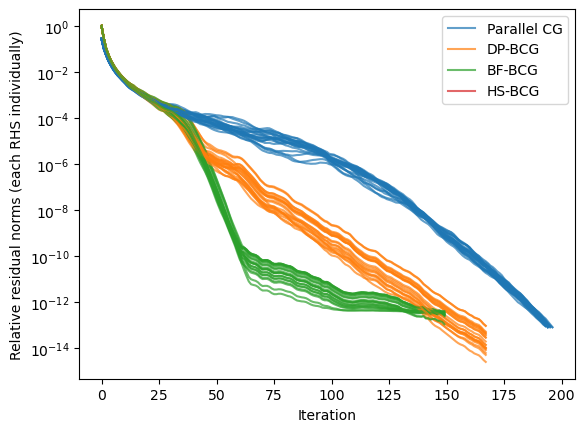

In [3]:
alpha = 0.7
for j in range(n_rhs):
    if j == 0:
        plt.semilogy( infos_p[j]["rel_residual_norms"] , color="C0", label="Parallel CG", alpha=alpha)
        plt.semilogy( info_dp["elem_rel_residual_norms"][j,:] , color="C1", label="DP-BCG", alpha=alpha)
        plt.semilogy( info_bf["elem_rel_residual_norms"][j,:] , color="C2", label="BF-BCG", alpha=alpha)
        plt.semilogy( info_hs["elem_rel_residual_norms"][j,:] , color="C3", label="HS-BCG", alpha=alpha)
    else:
        plt.semilogy( infos_p[j]["rel_residual_norms"] , color="C0", alpha=alpha)
        plt.semilogy( info_dp["elem_rel_residual_norms"][j,:] , color="C1", alpha=alpha)
        plt.semilogy( info_bf["elem_rel_residual_norms"][j,:] , color="C2", alpha=alpha)
        plt.semilogy( info_hs["elem_rel_residual_norms"][j,:] , color="C3", alpha=alpha)

plt.legend()
plt.ylabel("Relative residual norms (each RHS individually)")
plt.xlabel("Iteration")
plt.show()

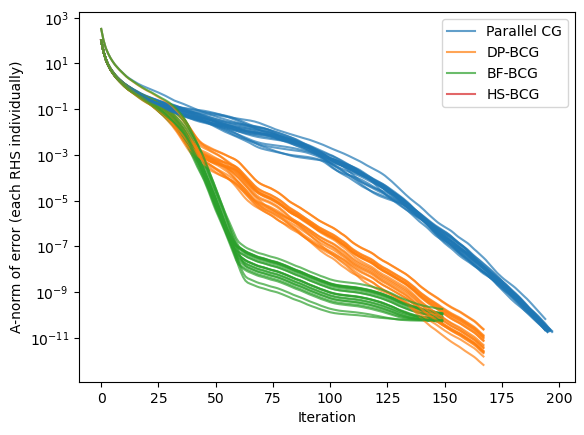

In [6]:
alpha = 0.7
for j in range(n_rhs):
    if j == 0:
        plt.semilogy( infos_p[j]["abs_A_errors"] , color="C0", label="Parallel CG", alpha=alpha)
        plt.semilogy( info_dp["elem_A_errs"][j,:] , color="C1", label="DP-BCG", alpha=alpha)
        plt.semilogy( info_bf["elem_A_errs"][j,:] , color="C2", label="BF-BCG", alpha=alpha)
        plt.semilogy( info_hs["elem_A_errs"][j,:] , color="C3", label="HS-BCG", alpha=alpha)
    else:
        plt.semilogy( infos_p[j]["abs_A_errors"] , color="C0", alpha=alpha)
        plt.semilogy( info_dp["elem_A_errs"][j,:] , color="C1", alpha=alpha)
        plt.semilogy( info_bf["elem_A_errs"][j,:] , color="C2", alpha=alpha)
        plt.semilogy( info_hs["elem_A_errs"][j,:] , color="C3", alpha=alpha)


plt.legend()
plt.ylabel("A-norm of error (each RHS individually)")
plt.xlabel("Iteration")
plt.show()

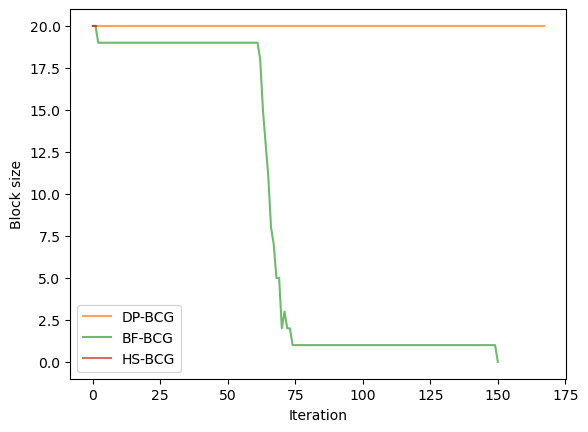

In [7]:
alpha = 0.7

plt.plot( info_dp["block_sizes"] , color="C1", label="DP-BCG", alpha=alpha)
plt.plot( info_bf["block_sizes"] , color="C2", label="BF-BCG", alpha=alpha)
plt.plot( info_hs["block_sizes"] , color="C3", label="HS-BCG", alpha=alpha)
   
plt.legend()
plt.ylabel("Block size")
plt.xlabel("Iteration")
plt.show()

# Example with rank-deficient $A$

In [6]:
# Make example SPD matrix A
grid_shape = (50,50)
A, K = laplacian2D_neumann(grid_shape)

# Make Xtrue and RHS B = A Xtrue
np.random.seed(0)
n_rhs = 20
Xtrue = np.random.normal(size=(A.shape[1],n_rhs))
Xtrue = Xtrue - ( K @ ( K.T @ Xtrue ) ) # remove anything outside of the kernel
B = A @ Xtrue

# Solve by various methods
tol = 1e-13
maxiter = 600
Xp, infos_p = parallelcg(A, B, X0=None, tol=tol, M=None, Xtrue=Xtrue, K=K)
Xdp, info_dp = blockcg(A, B, X0=None, tol=tol, variant="DP", Xtrue=Xtrue, maxiter=maxiter, K=K)
Xbf, info_bf = blockcg(A, B, X0=None, tol=tol, variant="BF", Xtrue=Xtrue, maxiter=maxiter, K=K)
Xhs, info_hs = blockcg(A, B, X0=None, tol=tol, variant="HS", Xtrue=Xtrue, maxiter=maxiter, K=K)

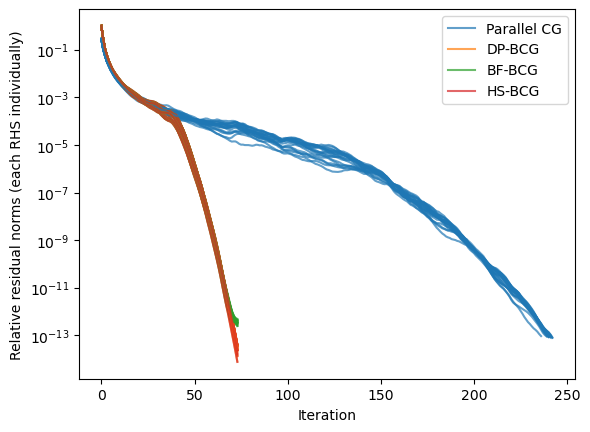

In [7]:
alpha = 0.7
for j in range(n_rhs):
    if j == 0:
        plt.semilogy( infos_p[j]["rel_residual_norms"] , color="C0", label="Parallel CG", alpha=alpha)
        plt.semilogy( info_dp["elem_rel_residual_norms"][j,:] , color="C1", label="DP-BCG", alpha=alpha)
        plt.semilogy( info_bf["elem_rel_residual_norms"][j,:] , color="C2", label="BF-BCG", alpha=alpha)
        plt.semilogy( info_hs["elem_rel_residual_norms"][j,:] , color="C3", label="HS-BCG", alpha=alpha)
    else:
        plt.semilogy( infos_p[j]["rel_residual_norms"] , color="C0", alpha=alpha)
        plt.semilogy( info_dp["elem_rel_residual_norms"][j,:] , color="C1", alpha=alpha)
        plt.semilogy( info_bf["elem_rel_residual_norms"][j,:] , color="C2", alpha=alpha)
        plt.semilogy( info_hs["elem_rel_residual_norms"][j,:] , color="C3", alpha=alpha)

plt.legend()
plt.ylabel("Relative residual norms (each RHS individually)")
plt.xlabel("Iteration")
plt.show()

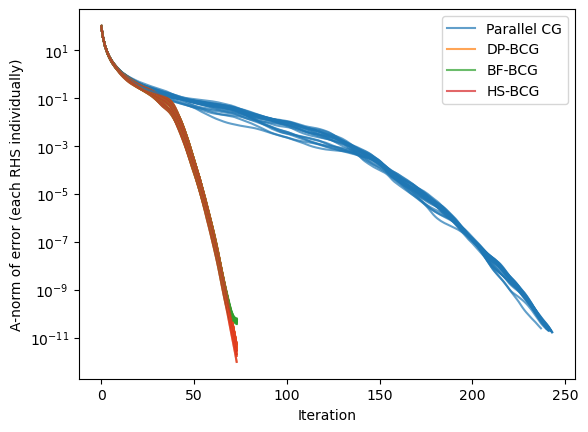

In [8]:
alpha = 0.7
for j in range(n_rhs):
    if j == 0:
        plt.semilogy( infos_p[j]["abs_A_errors"] , color="C0", label="Parallel CG", alpha=alpha)
        plt.semilogy( info_dp["elem_A_errs"][j,:] , color="C1", label="DP-BCG", alpha=alpha)
        plt.semilogy( info_bf["elem_A_errs"][j,:] , color="C2", label="BF-BCG", alpha=alpha)
        plt.semilogy( info_hs["elem_A_errs"][j,:] , color="C3", label="HS-BCG", alpha=alpha)
    else:
        plt.semilogy( infos_p[j]["abs_A_errors"] , color="C0", alpha=alpha)
        plt.semilogy( info_dp["elem_A_errs"][j,:] , color="C1", alpha=alpha)
        plt.semilogy( info_bf["elem_A_errs"][j,:] , color="C2", alpha=alpha)
        plt.semilogy( info_hs["elem_A_errs"][j,:] , color="C3", alpha=alpha)


plt.legend()
plt.ylabel("A-norm of error (each RHS individually)")
plt.xlabel("Iteration")
plt.show()

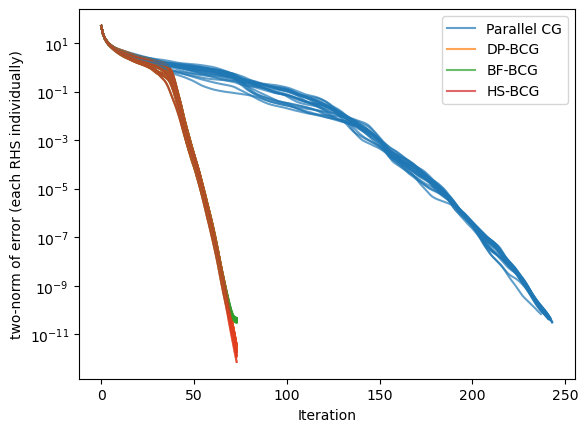

In [9]:
alpha = 0.7
for j in range(n_rhs):
    if j == 0:
        plt.semilogy( infos_p[j]["abs_two_errors"] , color="C0", label="Parallel CG", alpha=alpha)
        plt.semilogy( info_dp["elem_two_errs"][j,:] , color="C1", label="DP-BCG", alpha=alpha)
        plt.semilogy( info_bf["elem_two_errs"][j,:] , color="C2", label="BF-BCG", alpha=alpha)
        plt.semilogy( info_hs["elem_two_errs"][j,:] , color="C3", label="HS-BCG", alpha=alpha)
    else:
        plt.semilogy( infos_p[j]["abs_two_errors"] , color="C0", alpha=alpha)
        plt.semilogy( info_dp["elem_two_errs"][j,:] , color="C1", alpha=alpha)
        plt.semilogy( info_bf["elem_two_errs"][j,:] , color="C2", alpha=alpha)
        plt.semilogy( info_hs["elem_two_errs"][j,:] , color="C3", alpha=alpha)


plt.legend()
plt.ylabel("two-norm of error (each RHS individually)")
plt.xlabel("Iteration")
plt.show()

# Example with few distinct eigenvalues

In [4]:
A, _ = random_spd_with_p_eigenvalues(1000, 100, rseed=0)
K = None
np.random.seed(0)
n_rhs = 20
Xtrue = np.random.normal(size=(A.shape[1],n_rhs))
B = A @ Xtrue

# Solve by various methods
tol = 1e-13
maxiter = 600
Xp, infos_p = parallelcg(A, B, X0=None, tol=tol, M=None, Xtrue=Xtrue, K=K)
Xdp, info_dp = blockcg(A, B, X0=None, tol=tol, variant="DP", Xtrue=Xtrue, maxiter=maxiter, K=K)
Xbf, info_bf = blockcg(A, B, X0=None, tol=tol, variant="BF", Xtrue=Xtrue, maxiter=maxiter, K=K)
Xhs, info_hs = blockcg(A, B, X0=None, tol=tol, variant="HS", Xtrue=Xtrue, maxiter=maxiter, K=K)

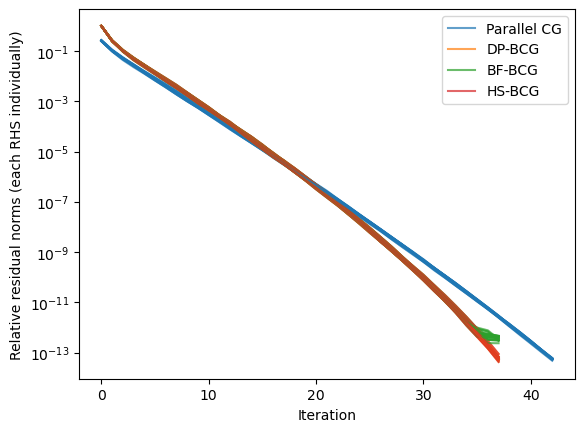

In [5]:
alpha = 0.7
for j in range(n_rhs):
    if j == 0:
        plt.semilogy( infos_p[j]["rel_residual_norms"] , color="C0", label="Parallel CG", alpha=alpha)
        plt.semilogy( info_dp["elem_rel_residual_norms"][j,:] , color="C1", label="DP-BCG", alpha=alpha)
        plt.semilogy( info_bf["elem_rel_residual_norms"][j,:] , color="C2", label="BF-BCG", alpha=alpha)
        plt.semilogy( info_hs["elem_rel_residual_norms"][j,:] , color="C3", label="HS-BCG", alpha=alpha)
    else:
        plt.semilogy( infos_p[j]["rel_residual_norms"] , color="C0", alpha=alpha)
        plt.semilogy( info_dp["elem_rel_residual_norms"][j,:] , color="C1", alpha=alpha)
        plt.semilogy( info_bf["elem_rel_residual_norms"][j,:] , color="C2", alpha=alpha)
        plt.semilogy( info_hs["elem_rel_residual_norms"][j,:] , color="C3", alpha=alpha)

plt.legend()
plt.ylabel("Relative residual norms (each RHS individually)")
plt.xlabel("Iteration")
plt.show()

# 